# Word-Embeddings

In [1]:
from nltk.tokenize import WordPunctTokenizer

In [8]:
tokenizer= WordPunctTokenizer()

In [9]:
quora=list(open("quora.txt"))

In [10]:
quora[0]

"Can I get back with my ex even though she is pregnant with another guy's baby?\n"

In [11]:
print(tokenizer.tokenize(quora[50]))

['What', 'TV', 'shows', 'or', 'books', 'help', 'you', 'read', 'people', "'", 's', 'body', 'language', '?']


In [20]:
quora_tokenized = [tokenizer.tokenize(line.lower()) for line in quora]

# Загрузим модель Word2Vec

In [21]:
from gensim.models import Word2Vec

In [22]:
model = Word2Vec(quora_tokenized, size=32, min_count=5, window = 3).wv #32 - длина каждого эмбеддинга
# min_count = 5 - используем слова, которые встречаются не меньше 5 раз 
# окно три по всему тектсу
# wv - переход от одного формата к другому

In [24]:
model.get_vector("anything")

array([ 0.06783853,  1.3825032 , -2.7246976 , -0.92408234,  0.0232767 ,
        2.3997722 ,  0.6975281 , -0.9556526 ,  0.7088055 ,  0.31122068,
        2.2454634 ,  0.7984384 , -0.81249005, -1.0437574 , -0.7532167 ,
        0.17282133,  2.5874712 , -0.540479  ,  0.04344096, -3.2973154 ,
       -0.26419455,  0.8514359 , -3.1282992 ,  0.8563487 ,  2.7535207 ,
       -3.0210552 ,  0.65756965, -3.210412  , -2.276562  , -1.0830716 ,
        2.7568905 , -0.90157485], dtype=float32)

Модель может давать векторные представления любого слова, которое было в словаре

### Найдем похожие слова

In [25]:
model.most_similar("tv")

[('television', 0.8999009132385254),
 ('anime', 0.7951961755752563),
 ('dvd', 0.7752636075019836),
 ('netflix', 0.7693058252334595),
 ('game', 0.7682012319564819),
 ('video', 0.7651222944259644),
 ('4k', 0.7635619640350342),
 ('animated', 0.7396115064620972),
 ('comedy', 0.7344316244125366),
 ('series', 0.7260004281997681)]

# Можно использовать предобученные эмбеддинги для корпусов текстов и скачать их с помощью gensim

In [26]:
import gensim.downloader as api

In [27]:
model = api.load("glove-twitter-100")

In [28]:
model.most_similar("dog")

[('cat', 0.8752089738845825),
 ('dogs', 0.8713089823722839),
 ('puppy', 0.8299306631088257),
 ('pet', 0.805988609790802),
 ('cats', 0.7908133864402771),
 ('horse', 0.773116946220398),
 ('bear', 0.7441996335983276),
 ('monkey', 0.7430413961410522),
 ('kitten', 0.7279505133628845),
 ('pig', 0.7153233289718628)]

In [29]:
model.most_similar(positive = ["coder", "money"], negative = ["brain"])

[('broker', 0.5820155739784241),
 ('bonuses', 0.5424473285675049),
 ('banker', 0.538511335849762),
 ('designer', 0.5197198390960693),
 ('merchandising', 0.4964233934879303),
 ('treet', 0.49220192432403564),
 ('shopper', 0.4920561909675598),
 ('part-time', 0.49128279089927673),
 ('freelance', 0.4843311905860901),
 ('aupair', 0.4796452522277832)]

# Визуализация

In [31]:
words = sorted(model.vocab.keys(), key = lambda word: model.vocab[word].count, reverse = True)[:1000]

In [33]:
print(words[::10])

['<user>', 'i', ')', 'no', 'la', 'o', '>', 'are', 'we', '♥', '_', 'now', '~', 'people', "'re", '>>', '[', 'q', 'je', 'never', 'please', 'c', 'hahaha', 'لا', 'then', 'itu', 'had', 'ah', 'esta', 'does', 'apa', 'les', 'work', 'god', 'ha', 'their', 'в', '\\', 'gue', '＾', 'justin', 'thing', 'hope', 'nigga', 'udah', 'same', 'voy', 'find', 'اللي', 'face', 'text', 'kau', 'very', 'may', 'pretty', 'already', 'qué', 'día', 'money', 'name', 'hari', 'wow', 'black', 'vamos', 'nao', 'head', 'trying', 'lot', 'ان', 'mad', 'playing', '✌', 'own', 'friday', 'estar', 'yet', 'une', 'mana', 'لي', 'car', 'once', 'nem', 'summer', 'fan', 'tudo', 'sexy', 'sea', 'excited', 'far', 'lost', 'sei', 'sabe', 'picture', 'dice', 'km', 'fast', 'moi', 'anda', 'noche', 'relationship']


Теперь получим эмбеддинги для всех слов, которые находятся в words

In [34]:
words_vectors = [model.get_vector(word) for word in words]

In [35]:
len(words_vectors)

1000

In [36]:
words_vectors[2]

array([ 1.0674e+00,  4.5716e-01,  5.1463e-01,  2.6679e-01,  1.9921e-01,
       -7.2329e-02,  7.8455e-02,  1.9458e-01,  4.2281e-01,  1.9280e-01,
        3.4424e-01, -4.1104e-01, -1.8649e+00, -1.4081e-01,  2.3753e-01,
        2.3077e-02, -1.1150e-01, -8.7478e-02, -1.6193e-01, -6.1093e-01,
       -3.1741e-01, -3.3686e-01, -1.0769e-01,  4.6179e-01,  1.7931e-01,
       -1.6432e+00, -2.0659e-01,  3.4077e-01,  3.8932e-01, -1.6806e-02,
       -3.4337e-01, -6.0921e-01, -1.0190e+00,  2.6511e-01,  8.5287e-01,
        2.8141e-01, -1.2736e-02,  4.1456e-01,  6.8343e-02, -8.7932e-02,
       -1.4830e+00, -7.2203e-02,  1.9278e-01,  6.4113e-01,  7.4135e-02,
       -3.6254e-01, -2.4202e-01, -1.2651e-01,  1.9001e-01, -4.0180e-01,
       -9.2765e-01, -3.3716e-01, -3.1579e-01, -9.0995e-02,  6.8764e-01,
        3.5058e-01, -1.2254e-01,  5.3486e-02,  2.4523e-01, -2.8901e-03,
       -7.7917e-01,  1.9829e-01, -1.9521e-01, -1.2721e+00,  7.1733e-01,
       -7.3878e-01, -1.6419e-01, -3.1932e-01,  5.1843e-02, -8.17

# Используем метод понижения размерности PCA для визуализации

In [37]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=2)
pca.fit(words_vectors)
word_vec_pca= pca.transform(words_vectors)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scal_word_vect = StandardScaler().fit_transform(word_vec_pca)

In [43]:
import matplotlib.pyplot as plt

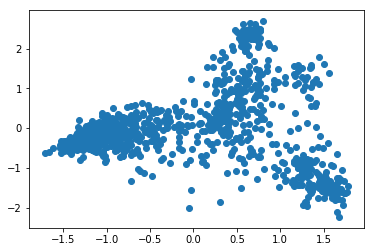

In [45]:
plt.scatter(scal_word_vect[:,0], scal_word_vect[:,1])